This notebook is responsible for the creation of singular and multiple regression models and displaying their results. Used in subchapter 3.2.1 "Linear regression" under method and subchapter 4.1.1 "Linear regression" under results. In addition used in subchapter 4.2 "Discussion of results".

In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#Loading in the dataset into a DataFrame
df2=pd.read_csv('../Data/TrondheimHousingDataCleaned.csv')
#Renmaing the columns so that they have no spaces in them
new_column_names = { 'Matrikkel / Org-Anr': 'Matrikkel_Org_Anr', 'Housing type': 'Housing_type', 'Primary room':'Primary_room'
                    , 'Usable area': 'Usable_area', 'Gross area':'Gross_area','Year of construction':'Year_of_construction'
                    , 'Plot size':'Plot_size', 'Last sold': 'Last_sold', 'Joint debt at last sale': 'Joint_debt_at_last_sale'
                    , 'Total price at last sale': 'Total_price_at_last_sale','Number of rooms':'Number_of_rooms', 
                    'Number of bedrooms':'Number_of_bedrooms', 'Registered date':'Registered_date','Turnover rate':'Turnover_rate',
                       'Postal code':'Postal_code','Broker encoded':'Broker_encoded',
                         'Housing type encoded':'Housing_type_encoded','Policy rate':'Policy_rate','Change CPI':'Change_CPI',
                         'HPI Norway':'HPI_Norway',
                         'HPI Trondheim':'HPI_Trondheim','Borrowing rate%':'Borrowing_rate%'}
df2 = df2.rename(columns=new_column_names)
df2

,Matrikkel_Org_Anr,Address,Housing_type,Primary_room,Usable_area,Gross_area,Year_of_construction,Floor,Plot_size,Last_sold,...,Lon,Year,Month,Day,Policy_rate,CPI,Change_CPI,HPI_Norway,HPI_Trondheim,Borrowing_rate%
0,5001-20/88/0/0,"Skogvegen 32, 7058 CHARLOTTENLUND",Selveier enebolig,441,517,567,2007.0,0,970.8,2021-02-28,...,10.4927,2021,2,28,0.0,115.3,0.7,130.7,123.5,1.77
1,5001-410/683/0/34,"Dyre Halses gate 11, 7042 TRONDHEIM",Selveierleilighet,55,55,60,2004.0,7,1043.2,2021-03-01,...,10.4134,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
2,5001-404/418/0/69,"Tellefsens gate 8, 7030 TRONDHEIM",Selveierleilighet,135,144,144,2019.0,5,3673.0,2021-03-01,...,10.3973,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
3,5001-52/224/0/128,"Heggdalsringen 65, 7049 TRONDHEIM",Selveierleilighet,69,73,73,2019.0,5,4572.6,2021-03-01,...,10.4535,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
4,5001-76/267/0/15,"Siriusvegen 10 A, 7037 TRONDHEIM",Selveierleilighet,74,74,81,1995.0,3,9300.8,2021-03-01,...,10.4113,2021,3,1,0.0,115.0,-0.3,130.7,123.5,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20079,5001-408/99/0/8,"Brinken 9, 7016 TRONDHEIM",Selveierleilighet,92,93,93,1912.0,5,538.3,2024-02-28,...,10.4051,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20080,977248744/16,"Anton Bergs veg 4 A, 7099 FLATÅSEN",Borettslagsleilighet,111,122,130,1998.0,1,8100.0,2024-02-28,...,10.3505,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20081,5001-95/128/0/0,"Gamle Åsvei 61, 7020 TRONDHEIM",Selveier enebolig,175,242,0,1925.0,0,801.0,2024-02-28,...,10.3541,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56
20082,5001-411/201/0/48,"Anders Buens gate 19, 7067 TRONDHEIM",Selveierleilighet,46,54,54,1939.0,4,1533.2,2024-02-28,...,10.4277,2024,2,28,4.5,134.8,0.0,136.4,131.4,5.56


In [32]:
#Checking the columns
columns_list = df2.columns.tolist()
print(columns_list)

['Matrikkel_Org_Anr', 'Address', 'Housing_type', 'Primary_room', 'Usable_area', 'Gross_area', 'Year_of_construction', 'Floor', 'Plot_size', 'Last_sold', 'Price', 'Joint_debt_at_last_sale', 'Total_price_at_last_sale', 'Number_of_rooms', 'Number_of_bedrooms', 'Registered_date', 'Turnover_rate', 'Broker', 'Postal_code', 'Broker_encoded', 'Housing_type_encoded', 'Balcony_Yes', 'Parking_Yes', 'Lat', 'Lon', 'Year', 'Month', 'Day', 'Policy_rate', 'CPI', 'Change_CPI', 'HPI_Norway', 'HPI_Trondheim', 'Borrowing_rate%']


In [33]:
#Looking at the value types
print(df2.dtypes)

Matrikkel_Org_Anr            object
Address                      object
Housing_type                 object
Primary_room                  int64
Usable_area                   int64
Gross_area                    int64
Year_of_construction        float64
Floor                         int64
Plot_size                   float64
Last_sold                    object
Price                         int64
Joint_debt_at_last_sale     float64
Total_price_at_last_sale    float64
Number_of_rooms               int64
Number_of_bedrooms            int64
Registered_date              object
Turnover_rate                 int64
Broker                       object
Postal_code                   int64
Broker_encoded                int64
Housing_type_encoded          int64
Balcony_Yes                   int64
Parking_Yes                   int64
Lat                         float64
Lon                         float64
Year                          int64
Month                         int64
Day                         

In [34]:
#mod1 = smf.ols('Total_price_at_last_sale~Matrikkel_Org_Anr +Address + Housing_type + Primary_room + Usable_area + Gross_area+ Year_of_construction + Floor + Plot_size + Last_sold + Price + Joint_debt_at_last_sale + Number_of_rooms + Number_of_bedrooms + Registered_date + Turnover_rate + Broker + Postal_code + Area_name + Broker_encoded + Housing_type_encoded + Balcony_Yes + Parking_Yes + Lat + Lon', data = df2).fit()
#mod1.summary()

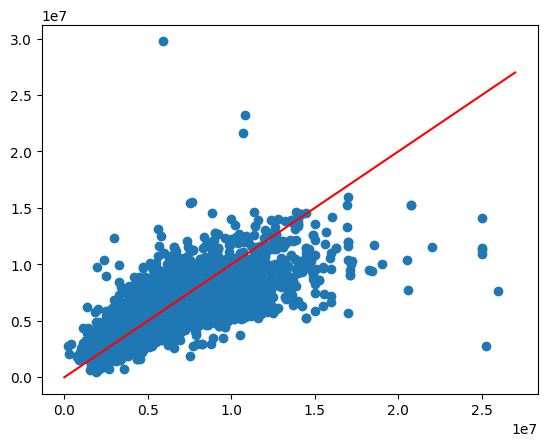

In [35]:
#Splitting the DataFrame into predictor variables and dependent variable and dropping variables that can't be used for linear regression
X=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type','Last_sold','Registered_date','Broker'])
y=df2['Total_price_at_last_sale']

#Creating a linear regession model, fitting it on the dataset and using it to predict values
model=LinearRegression().fit(X,y)
y_pred=model.predict(X)

#Plotting the regression line on the predicted and actual values
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y,y_pred)
plt.show()

In [36]:
#Adding a constant term for intercept
X_with_intercept = sm.add_constant(X)

# Fitting the model on the data
model = sm.OLS(y, X_with_intercept)
result = model.fit()

# Printing summary to see both R-squared value and p-values to know which variables are insignificant and should be removed
print(result.summary())


                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.682
Model:                                  OLS   Adj. R-squared:                  0.681
Method:                       Least Squares   F-statistic:                     1653.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:11   Log-Likelihood:            -3.0897e+05
No. Observations:                     20084   AIC:                         6.180e+05
Df Residuals:                         20057   BIC:                         6.182e+05
Df Model:                                26                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

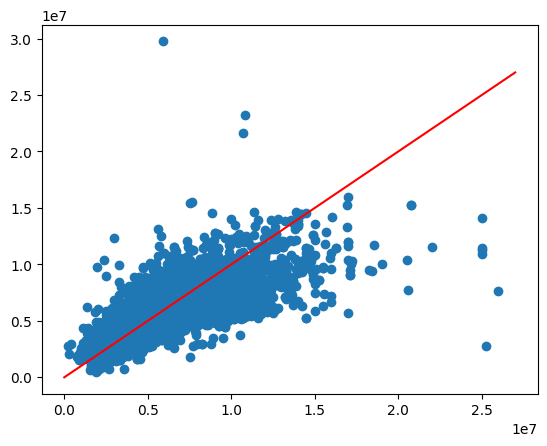

In [37]:
#Doing the same thing again while dropping the most insignificant variable: Turnover_rate
X2=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type','Last_sold','Registered_date','Broker','Year'])
y2=df2['Total_price_at_last_sale']
model2=LinearRegression().fit(X2,y2)
y_pred2=model2.predict(X2)
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y2,y_pred2)
plt.show()

In [38]:
#Doing the same as before
X_with_intercept2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X_with_intercept2)
result2 = model2.fit()

print(result2.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.682
Model:                                  OLS   Adj. R-squared:                  0.681
Method:                       Least Squares   F-statistic:                     1719.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:12   Log-Likelihood:            -3.0897e+05
No. Observations:                     20084   AIC:                         6.180e+05
Df Residuals:                         20058   BIC:                         6.182e+05
Df Model:                                25                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

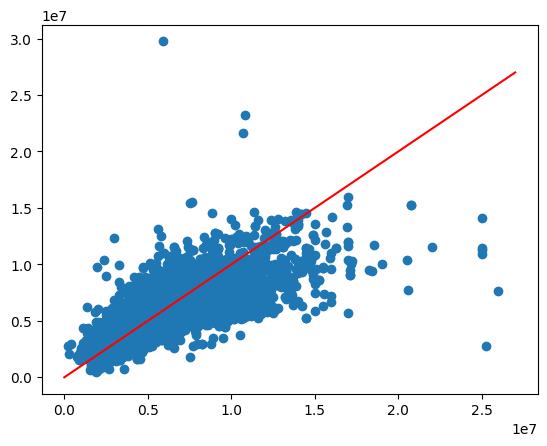

In [39]:
#Doing the same, further removal of insignificant variables
X3=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type','Last_sold','Registered_date','Broker','Year','Policy_rate'])
y3=df2['Total_price_at_last_sale']
model3=LinearRegression().fit(X3,y3)
y_pred3=model3.predict(X3)
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y3,y_pred3)
plt.show()

In [40]:
#Further summary
X_with_intercept3 = sm.add_constant(X3)

model3 = sm.OLS(y3, X_with_intercept3)
result3 = model3.fit()

print(result3.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.682
Model:                                  OLS   Adj. R-squared:                  0.681
Method:                       Least Squares   F-statistic:                     1790.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:12   Log-Likelihood:            -3.0897e+05
No. Observations:                     20084   AIC:                         6.180e+05
Df Residuals:                         20059   BIC:                         6.182e+05
Df Model:                                24                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

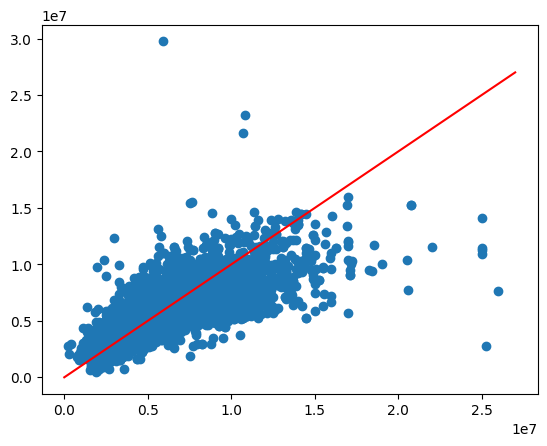

In [41]:
#Dropping the third most insignificant variable
X4=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type'
                      ,'Last_sold','Registered_date','Broker','Year','Policy_rate','Turnover_rate'])
y4=df2['Total_price_at_last_sale']
model4=LinearRegression().fit(X4,y4)
y_pred4=model4.predict(X4)
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y4,y_pred4)
plt.show()

In [42]:
#Another summary
X_with_intercept4 = sm.add_constant(X4)

model4 = sm.OLS(y4, X_with_intercept4)
result4 = model4.fit()

print(result4.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.682
Model:                                  OLS   Adj. R-squared:                  0.681
Method:                       Least Squares   F-statistic:                     1868.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:12   Log-Likelihood:            -3.0897e+05
No. Observations:                     20084   AIC:                         6.180e+05
Df Residuals:                         20060   BIC:                         6.182e+05
Df Model:                                23                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

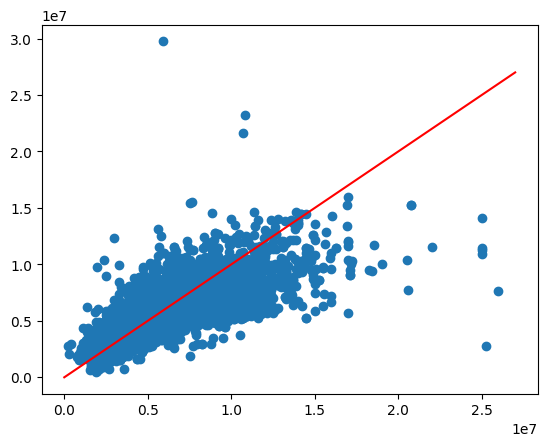

In [43]:
#Repeating the process
X5=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type'
                      ,'Last_sold','Registered_date','Broker','Year','Policy_rate','Turnover_rate','Change_CPI'])
y5=df2['Total_price_at_last_sale']
model5=LinearRegression().fit(X5,y5)
y_pred5=model5.predict(X5)
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y5,y_pred5)
plt.show()

In [44]:
#Another summary
X_with_intercept5 = sm.add_constant(X5)

model5 = sm.OLS(y5, X_with_intercept5)
result5 = model5.fit()

print(result5.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.682
Model:                                  OLS   Adj. R-squared:                  0.681
Method:                       Least Squares   F-statistic:                     1953.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:13   Log-Likelihood:            -3.0897e+05
No. Observations:                     20084   AIC:                         6.180e+05
Df Residuals:                         20061   BIC:                         6.182e+05
Df Model:                                22                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

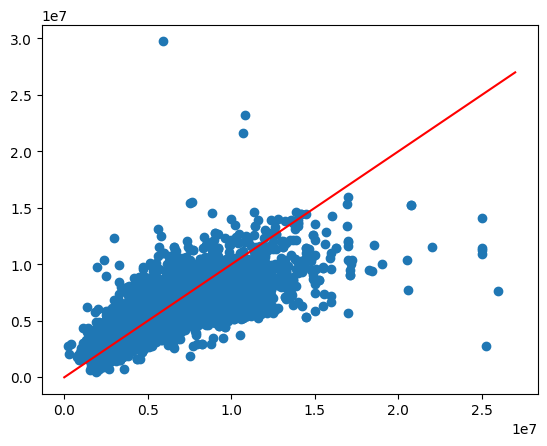

In [45]:
#Repeating the process
X6=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type'
                      ,'Last_sold','Registered_date','Broker','Year','Policy_rate','Turnover_rate','Change_CPI','Month'])
y6=df2['Total_price_at_last_sale']
model6=LinearRegression().fit(X6,y6)
y_pred6=model6.predict(X6)
fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y6,y_pred6)
plt.show()

In [46]:
#Another summary
X_with_intercept6 = sm.add_constant(X6)

model6 = sm.OLS(y6, X_with_intercept6)
result6 = model6.fit()

print(result6.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.682
Model:                                  OLS   Adj. R-squared:                  0.681
Method:                       Least Squares   F-statistic:                     2046.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:13   Log-Likelihood:            -3.0897e+05
No. Observations:                     20084   AIC:                         6.180e+05
Df Residuals:                         20062   BIC:                         6.182e+05
Df Model:                                21                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

In [47]:
#Repeating the process
X7=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type'
                      ,'Last_sold','Registered_date','Broker','Year','Policy_rate','Turnover_rate','Change_CPI','Month',
                      'Borrowing_rate%'])
y7=df2['Total_price_at_last_sale']
model7=LinearRegression().fit(X7,y7)
y_pred7=model7.predict(X7)

X_with_intercept7 = sm.add_constant(X7)

model7 = sm.OLS(y7, X_with_intercept7)
result7 = model7.fit()

print(result7.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.682
Model:                                  OLS   Adj. R-squared:                  0.681
Method:                       Least Squares   F-statistic:                     2149.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:13   Log-Likelihood:            -3.0897e+05
No. Observations:                     20084   AIC:                         6.180e+05
Df Residuals:                         20063   BIC:                         6.181e+05
Df Model:                                20                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.682
Model:                                  OLS   Adj. R-squared:                  0.681
Method:                       Least Squares   F-statistic:                     2261.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:13   Log-Likelihood:            -3.0897e+05
No. Observations:                     20084   AIC:                         6.180e+05
Df Residuals:                         20064   BIC:                         6.181e+05
Df Model:                                19                                         
Covariance Type:                  nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

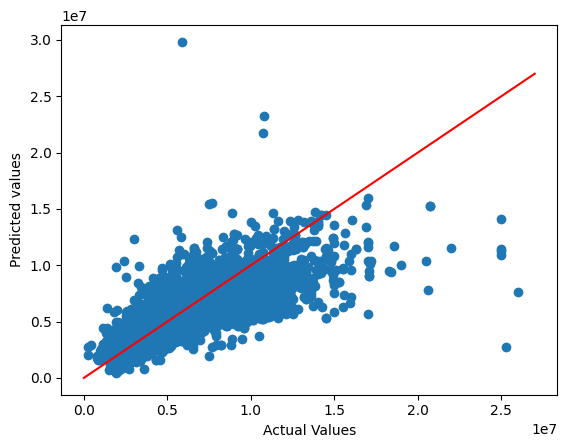

In [48]:
#Repeating the process
X8=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type'
                      ,'Last_sold','Registered_date','Broker','Year','Policy_rate','Turnover_rate','Change_CPI','Month',
                      'Borrowing_rate%','Gross_area'])
y8=df2['Total_price_at_last_sale']
model8=LinearRegression().fit(X8,y8)
y_pred8=model8.predict(X8)

X_with_intercept8 = sm.add_constant(X8)

model8 = sm.OLS(y8, X_with_intercept8)
result8 = model8.fit()

print(result8.summary())

fig, ax=plt.subplots()
line=np.linspace(0,27000000,2)
plt.plot(line,line,color='red')
plt.scatter(y8,y_pred8)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.show()

In [49]:
#Removing the final variable
X8=df2.drop(columns= ['Price','Total_price_at_last_sale','Matrikkel_Org_Anr','Address','Housing_type'
                      ,'Last_sold','Registered_date','Broker','Year','Policy_rate','Turnover_rate','Change_CPI','Month',
                      'Borrowing_rate%','Gross_area','Day','Joint_debt_at_last_sale','Parking_Yes',
                      'HPI_Norway','Lon','Balcony_Yes'])
y8=df2['Total_price_at_last_sale']
model8=LinearRegression().fit(X8,y8)
y_pred8=model8.predict(X8)

X_with_intercept8 = sm.add_constant(X8)

model8 = sm.OLS(y8, X_with_intercept8)
result8 = model8.fit()

print(result8.summary())

                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.680
Model:                                  OLS   Adj. R-squared:                  0.680
Method:                       Least Squares   F-statistic:                     3282.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:14   Log-Likelihood:            -3.0902e+05
No. Observations:                     20084   AIC:                         6.181e+05
Df Residuals:                         20070   BIC:                         6.182e+05
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In the following code, we used OpenAI's ChatGPT to help split the data into training and testing subsets for the linear regression. We asked how to use training and testing sets with Statsmodels.

In [50]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X8, y8, test_size=0.3, random_state=42)

# Fitting the model
model8 = LinearRegression().fit(X_train, y_train)

# Predicting using the test data
y_pred8 = model8.predict(X_test)

# Adding a constant term
X_train_with_intercept = sm.add_constant(X_train)
X_test_with_intercept = sm.add_constant(X_test)

# Fitting the model
model_stats = sm.OLS(y_test, X_test_with_intercept)
results = model_stats.fit()

print(results.summary())


                               OLS Regression Results                               
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.693
Model:                                  OLS   Adj. R-squared:                  0.692
Method:                       Least Squares   F-statistic:                     1044.
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:14   Log-Likelihood:                -92667.
No. Observations:                      6026   AIC:                         1.854e+05
Df Residuals:                          6012   BIC:                         1.855e+05
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [51]:
#Making a dataset for the two variables that we will use in a singular linear regression
enkel=df2.loc[:,['Total_price_at_last_sale','Usable_area']]
enkel

,Total_price_at_last_sale,Usable_area
0,16900000.0,517
1,4380000.0,55
2,12500000.0,144
3,4950000.0,73
4,3500690.0,74
...,...,...
20079,5317000.0,93
20080,3327144.0,122
20081,7750000.0,242
20082,2910300.0,54


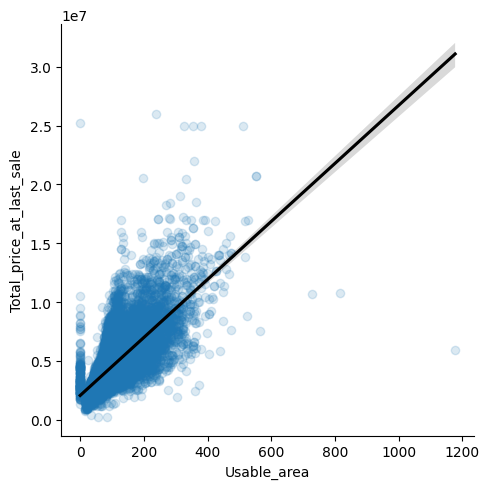

In [52]:
#Plotting the two variables in a scatter plot
sns.lmplot(x='Usable_area', y='Total_price_at_last_sale', data=enkel, line_kws={'color': 'black'},scatter_kws={'alpha': 0.16})
plt.show()

In [53]:
#Producing the regression results
mod1 = smf.ols('Total_price_at_last_sale~Usable_area', data = enkel).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Total_price_at_last_sale   R-squared:                       0.561
Model:                                  OLS   Adj. R-squared:                  0.561
Method:                       Least Squares   F-statistic:                 2.567e+04
Date:                      Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                              14:32:16   Log-Likelihood:            -3.1219e+05
No. Observations:                     20084   AIC:                         6.244e+05
Df Residuals:                         20082   BIC:                         6.244e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.061e+06   1.71e+04    120.441      0.000    2.03e+06    2.09e+06
Usable_area  2.467e+04    153.959    160.233      0.000    2.44e+04     2.5e+04
==============================================================================
Omnibus:                     9138.346   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           347763.544
Skew:                           1.514   Prob(JB):                         0.00
Kurtosis:                      23.159   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""